## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers 

## Read the Dataset

In [5]:
df = pd.read_csv(r"/content/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


## Handling Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [7]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

## Handling Outliers

<ipython-input-8-5a8c293dc427>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


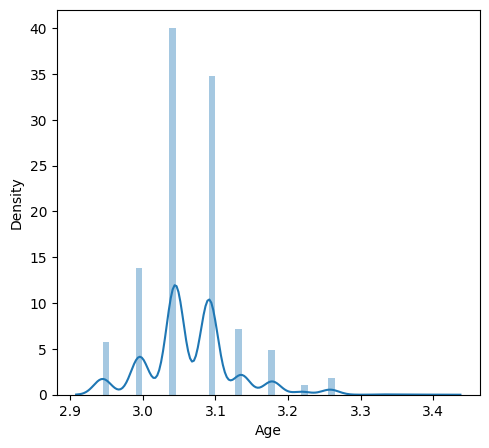

In [8]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)

transformationplot(np.log(df['Age']))

## Handling Catogarical Values

In [9]:
df = df.replace(['Male','Female'],[1,0])


In [10]:
df = df.replace(['Computer Science', 'Information Technology', 'Electronics And Communication', 'Mechanical', 'Electrical', 'Civil'], [0,1,2,3,4,5])

In [11]:
df = df.drop(['Hostel'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   HistoryOfBacklogs  2966 non-null   int64
 6   PlacedOrNot        2966 non-null   int64
dtypes: int64(7)
memory usage: 162.3 KB


In [13]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,2,1,8,1,1
1,21,0,0,0,7,1,1
2,22,0,1,1,6,0,1
3,21,1,1,0,8,1,1
4,22,1,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,1,1,0,7,0,0
2962,23,1,3,1,7,0,0
2963,22,1,1,1,7,0,0
2964,22,1,0,1,7,0,0


## Univariate Analysis   Task - 3

<ipython-input-14-edb0e44b8311>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'], color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

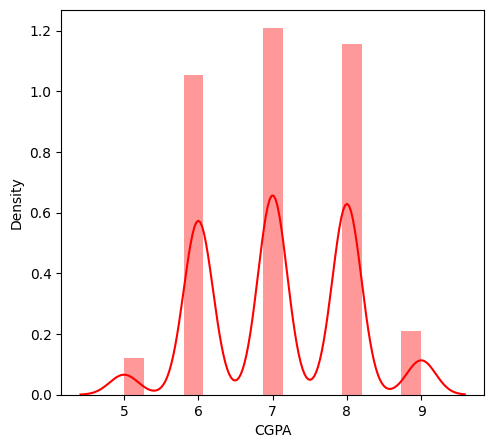

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'], color='r')

<ipython-input-15-dd2b8e7cf279>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'], color='r')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

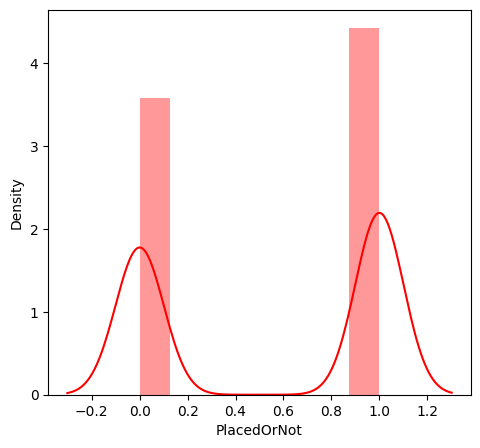

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'], color='r')

##Bivariate Analysis

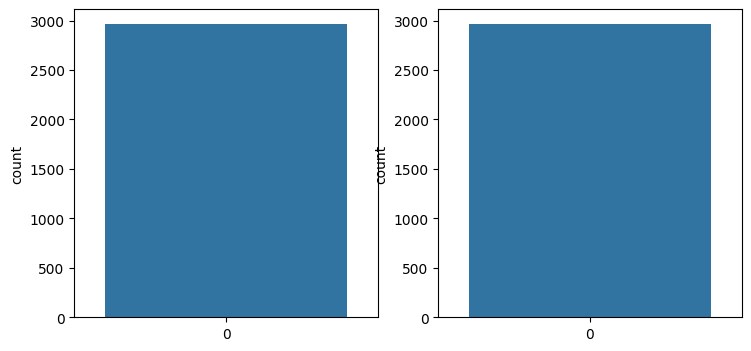

In [16]:
plt.figure(figsize=(18,4))
plt.subplot(1, 4, 1)
sns.countplot(df['Gender'])
plt.subplot(1, 4, 2)
sns.countplot(df['Stream'])
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

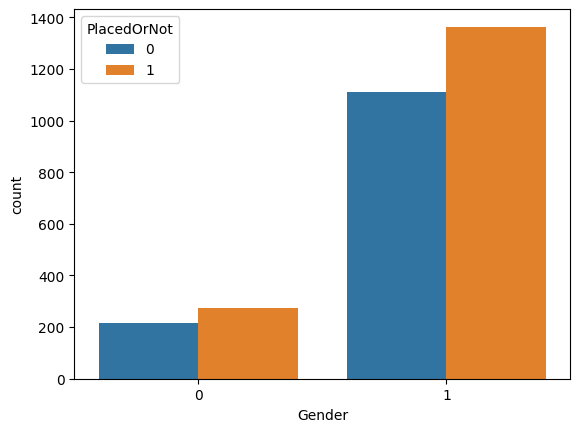

In [17]:
sns.countplot(x="Gender", hue="PlacedOrNot", data=df)

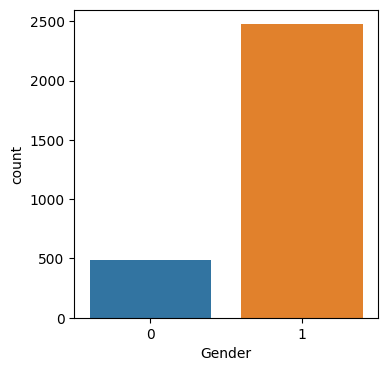

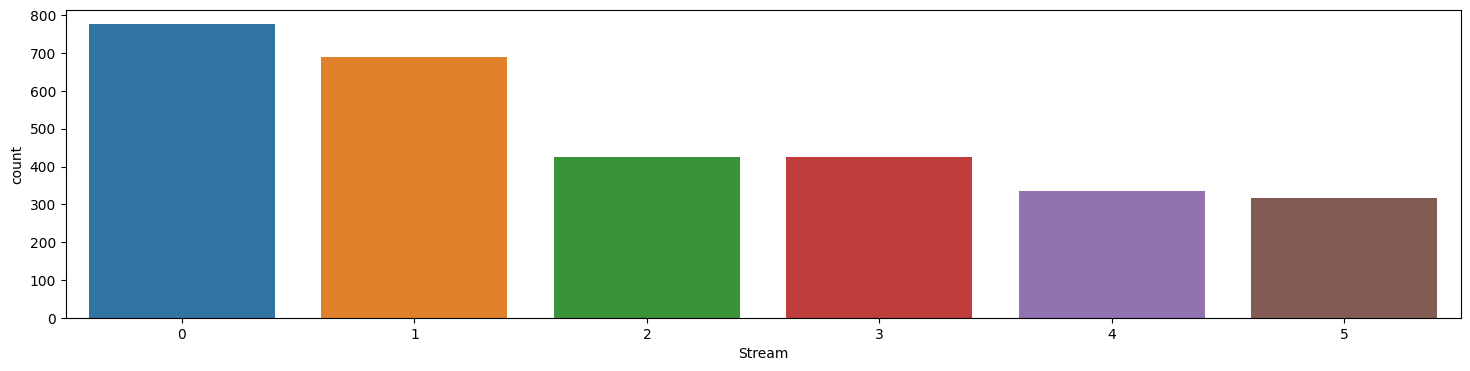

In [18]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x=df['Gender'])
plt.figure(figsize=(18,4))
plt.subplot(1,1,1)
sns.countplot(x=df['Stream'])
plt.show()

##Multivariate Analysis

<Axes: xlabel='PlacedOrNot', ylabel='count'>

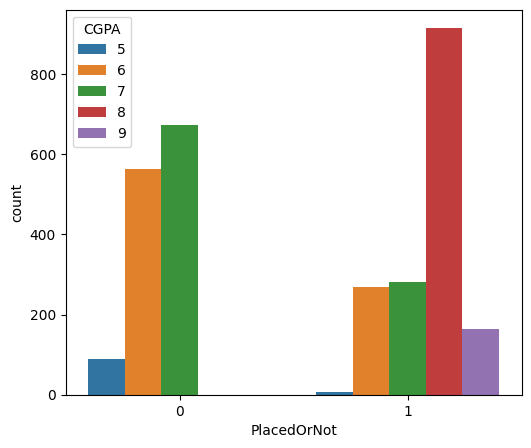

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data=df, x="PlacedOrNot", hue="CGPA")

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


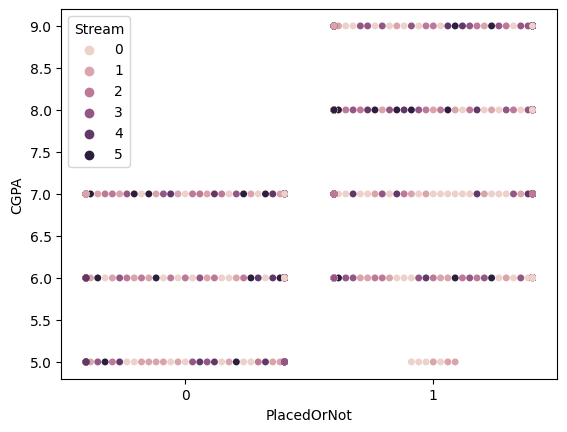

In [20]:
# create swarmplot with hue based on "Stream" column
sns.swarmplot(x=df['PlacedOrNot'], y=df['CGPA'], hue=df['Stream'])
plt.show()

##Scaling the Data

In [21]:
# separate features and target variable
x = df.drop(['HistoryOfBacklogs'], axis=1)
y = df['Internships']

# create a StandardScaler object
sc = StandardScaler()

# standardize the values of the features in x
x_bal = sc.fit_transform(x)

# print the standardized dataset
print(x_bal)

[[ 0.38813058  0.44540301  0.04008175  0.40044544  0.95719068  0.89979999]
 [-0.36675158 -2.24515772 -1.14874288 -0.95077319 -0.07631043  0.89979999]
 [ 0.38813058 -2.24515772 -0.55433057  0.40044544 -1.10981154  0.89979999]
 ...
 [ 0.38813058  0.44540301 -0.55433057  0.40044544 -0.07631043 -1.11135809]
 [ 0.38813058  0.44540301 -1.14874288  0.40044544 -0.07631043 -1.11135809]
 [ 1.14301273  0.44540301  1.82331869 -0.95077319  0.95719068  0.89979999]]


In [22]:
names = x.columns
x_bal = pd.DataFrame(x_bal,columns=names)
print(x_bal)

           Age    Gender    Stream  Internships      CGPA  PlacedOrNot
0     0.388131  0.445403  0.040082     0.400445  0.957191     0.899800
1    -0.366752 -2.245158 -1.148743    -0.950773 -0.076310     0.899800
2     0.388131 -2.245158 -0.554331     0.400445 -1.109812     0.899800
3    -0.366752  0.445403 -0.554331    -0.950773  0.957191     0.899800
4     0.388131  0.445403  0.634494    -0.950773  0.957191     0.899800
...        ...       ...       ...          ...       ...          ...
2961  1.143013  0.445403 -0.554331    -0.950773 -0.076310    -1.111358
2962  1.143013  0.445403  0.634494     0.400445 -0.076310    -1.111358
2963  0.388131  0.445403 -0.554331     0.400445 -0.076310    -1.111358
2964  0.388131  0.445403 -1.148743     0.400445 -0.076310    -1.111358
2965  1.143013  0.445403  1.823319    -0.950773  0.957191     0.899800

[2966 rows x 6 columns]


##Splitting the Data into Train and Test

In [23]:
# check the dataframe columns
print(df.columns)

# convert categorical variables to numerical using one-hot encoding
if 'Gender' in df.columns and 'Stream' in df.columns:
    df = pd.get_dummies(df, columns=['Gender', 'Stream'], drop_first=True)

# separate features and target variable
X = df.drop(['PlacedOrNot'], axis=1)

# create a StandardScaler object
scaler = StandardScaler()

# standardize the values of the features in X
standardized_data = scaler.fit_transform(X)

# assign the standardized features to X
X = standardized_data

# assign the "PlacedOrNot" target variable to Y
Y = df['PlacedOrNot']

# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'HistoryOfBacklogs',
       'PlacedOrNot'],
      dtype='object')
X_train shape: (2372, 10)
Y_train shape: (2372,)
X_test shape: (594, 10)
Y_test shape: (594,)


## Milestone 4: Model Building Task_4

##SVM Model

In [24]:
# create an SVM classifier with a linear kernel
classifier = svm.SVC(kernel='linear')

# train the classifier on the training data
classifier.fit(X_train, Y_train)

# print the accuracy of the classifier on the training and testing data
print("Training accuracy:", classifier.score(X_train, Y_train))
print("Testing accuracy:", classifier.score(X_test, Y_test))

Training accuracy: 0.7841483979763912
Testing accuracy: 0.797979797979798


In [25]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Accuracy score of the training data :', training_data_accuracy)

Accuracy score of the training data : 0.7841483979763912


##KNN Model 

In [27]:
best_k = {"Regular":0}
best_score = {"Regular":0}
for k in range(3,50,2):
  
    ## Using Regular training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)              # Instantiate the model
    knn_temp.fit(X_train, Y_train)                              # Fit the model to the training set
    knn_temp_pred = knn_temp.predict(X_test)                    # Predict on the test set
    score = metrics.accuracy_score(Y_test, knn_temp_pred)*100   # Get accuracy
    if score >= best_score["Regular"] and score < 100:          # Store best params
        best_score["Regular"] = score
        best_k["Regular"] = k


In [28]:
print("---Results---\nK: {}\nScore: {}".format(best_k, best_score))

## Instantiate the Models
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])

## Fit the Model to the Training Set
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
testd = accuracy_score(knn_pred, Y_test)

---Results---
K: {'Regular': 3}
Score: {'Regular': 84.84848484848484}


##Artificial Neural Network Model

In [29]:
classifier = Sequential()

# Add input layer and first hidden layer
classifier.add(keras.layers.Dense(10, activation='relu', input_dim=10))
classifier.add(keras.layers.Dropout(0.50))

# Add 2nd hidden layer
classifier.add(keras.layers.Dense(10, activation='relu'))
classifier.add(keras.layers.Dropout(0.50))

# Final or output layer
classifier.add(keras.layers.Dense(1, activation='sigmoid'))

# Compiling the model
loss_1 = tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam', loss=loss_1, metrics=['accuracy'])

# Fitting the model
classifier.fit(X_train, Y_train, batch_size=20, epochs=100)


Epoch 1/100
119/119 [==============================] - 2s 2ms/step - loss: 0.7702 - accuracy: 0.5594
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5898
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5877
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6168
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.6294
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.6648
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.6657
Epoch 8/100
119/119 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.6792
Epoch 9/100
119/119 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.6859
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.5417 - accura